## 5a

We are given that 
$$CE(y, \hat{y}) = - \sum_{k=1}^K y_k \log \hat{y_k},$$

By multivariate chain rule, we have the following

$$ \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = [\nabla_{z^{(i)}} \mathrm{softmax}(z^{(i)})] [\nabla_{\hat{y}^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)})] $$

We will find both terms independently. 

$$ \nabla_{\hat{y}^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = \nabla_{\hat{y}^{(i)}} [- \sum_{k=1}^K y_k^{(i)} \log \hat{y_k^{(i)}}] = -\begin{pmatrix}\frac{y_1^{(i)}}{\hat{y}_l^{(i)}}\\ \\ \frac{y_2^{(i)}}{\hat{y}_2^{(i)}}\\ \\ \vdots \\ \\ \frac{y_k^{(i)}}{\hat{y}_k^{(i)}}\end{pmatrix}$$

the l-th element of the softmax function is given by

$$ \hat{y}_l^{(i)} = \mathrm{softmax}(z^{(i)}_l) = \frac{\exp{(z^{(i)}_l)}}{\sum_{j=1}^k \exp{(z^{(i)}_j)}}$$

Since all of the terms of the vector have the same form, we only need to consider, $\frac{\partial }{\partial z^{(i)}_l}\mathrm{softmax}(z^{(i)}_l)$ for the diagonal terms and for the off-diagonal terms $c\neq l$, $\frac{\partial }{\partial z^{(i)}_c}\mathrm{softmax}(z^{(i)}_l)$

$$ \frac{\partial }{\partial z^{(i)}_l}\mathrm{softmax}(z^{(i)}_l) = \frac{\exp{(z^{(i)}_l)}\sum_{j=1}^k \exp{(z^{(i)}_j)} - \exp{(z^{(i)}_l)}\exp{(z^{(i)}_l)}}{(\sum_{j=1}^k \exp{(z^{(i)}_j)})^2} = \frac{\exp{(z^{(i)}_l)}}{\sum_{j=1}^k \exp{(z^{(i)}_j)}}\cdot \frac{\sum_{j=1}^k \exp{(z^{(i)}_j)} - \exp{(z^{(i)}_l)}}{\sum_{j=1}^k \exp{(z^{(i)}_j)}} \\ = \mathrm{softmax}(z^{(i)}_l) \cdot (1- \mathrm{softmax}(z^{(i)}_l)) = \hat{y}_l^{(i)}(1-\hat{y}_l^{(i)})$$

for the off-diagonal terms $c\neq l$,

$$\frac{\partial }{\partial z^{(i)}_c}\mathrm{softmax}(z^{(i)}_l) = \exp{(z^{(i)}_l)} \cdot [-(\sum_{j=1}^k \exp{(z^{(i)}_j)})^{-2}] \exp{(z^{(i)}_c)} = -\frac{\exp{(z^{(i)}_l)}}{\sum_{j=1}^k \exp{(z^{(i)}_j)}}\cdot \frac{\exp{(z^{(i)}_c)}}{\sum_{j=1}^k \exp{(z^{(i)}_j)}} = - \mathrm{softmax}(z^{(i)}_l)\cdot \mathrm{softmax}(z^{(i)}_c)= - \hat{y}_l^{(i)} \hat{y}_c^{(i)}$$

Finding the h-th index of $\nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)})$ we have 

$$-\begin{pmatrix}\frac{y_1^{(i)}}{\hat{y}_l^{(i)}}  \frac{y_2^{(i)}}{\hat{y}_2^{(i)}}  \dots  \frac{y_h^{(i)}}{\hat{y}_h^{(i)}} \dots  \frac{y_k^{(i)}}{\hat{y}_k^{(i)}}\end{pmatrix} \begin{pmatrix} -\hat{y}_1^{(i)} \hat{y}_h^{(i)}\\ \\ -\hat{y}_2^{(i)} \hat{y}_h^{(i)}\\ \\ \vdots \\ \\ \hat{y}_h^{(i)}(1-\hat{y}_h^{(i)})\\ \\ -\hat{y}_k^{(i)} \hat{y}_h^{(i)}\end{pmatrix} = -y_h^{(i)} + \hat{y}_h^{(i)} \sum_{j=1}^k y_j^{(i)} = \hat{y}_h^{(i)} -y_h^{(i)}$$

The last equality is due to $\sum_{j=1}^k y_j^{(i)} = 1$ as $y^{(i)}$ is a one-hot label vector.


Since the h-th term of $\nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) $ is $\hat{y}_h^{(i)} -y_h^{(i)}$, We have 

$$ \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = \hat{y}^{(i)} - y^{(i)}$$

## 5b
Do note that $\odot$ is called Hadamard product, also known as element-wise product. and $\cdot$ is the dot product, $x\cdot y = x^Ty$

We need to compute the vector derivative wrt each of the params. Namely, $W1,W2,b1,b2$. We first compute $\nabla_{W^{[2]}}z^{(i)}$ and $\nabla_{b2}$

$$ \nabla_{W^{[2]}}z^{(i)} = \nabla_{W^{[2]}} [{W^{[2]}}^\top x^{(i)} \cdot a^{(i)} +b2] = a^{(i)} $$

$$ \nabla_{b2}z^{(i)} = \nabla_{b2} [{W^{[2]}}^\top x^{(i)} \cdot a^{(i)} +b2]= I_{10}$$

Since $ \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = \hat{y}^{(i)} - y^{(i)}$

$$\nabla_{W^{[2]}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) \, \nabla_{W^{[2]}}z^{(i)} = (\hat{y}^{(i)} - y^{(i)}) a^{(i)T}$$

$$\nabla_{b2} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) = \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) \, \nabla_{b2}z^{(i)} = (\hat{y}^{(i)} - y^{(i)})$$

to find the derivative wrt $W1,b1$, we need to do a bit more work. we first compute


$$ \nabla_{a^{i}}z^{(i)} = \nabla_{a^{i}} [ {W^{[2]}}^\top \cdot a^{(i)} +b2]= {W^{[2]}}^\top$$

Since we know that $a^{(i)} = \sigma \left( {W^{[1]}}^\top x^{(i)}  + b^{[1]} \right)$. 

$$ \nabla_{W^{[1]}} a^{(i)} = \sigma \left( a^{(i)} \right) \odot \left(1-\sigma \left( a^{(i)} \right) \right) x^{(i)T} $$

$$ \nabla_{b^{[1]}} a^{(i)} = \sigma \left( a^{(i)} \right) \odot \left(1-\sigma \left( a^{(i)} \right) \right) $$

Combining all together

$$ \nabla_{W^{[1]}}z^{(i)} = \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) \,\nabla_{a^{i}}z^{(i)} \,\nabla_{W^{[1]}} a^{(i)} =  \left(\hat{y}^{(i)} - y^{(i)}\right) \cdot {W^{[2]}}^\top\sigma \left( a^{(i)} \right) \odot \left(1-\sigma \left( a^{(i)} \right) \right) x^{(i)T} $$

$$ \nabla_{b^{[1]}}z^{(i)} = \nabla_{z^{(i)}} \mathrm{CE}(y^{(i)}, \hat{y}^{(i)}) \,\nabla_{a^{i}}z^{(i)} \,\nabla_{b^{[1]}} a^{(i)} =  \left(\hat{y}^{(i)} - y^{(i)}\right) \cdot {W^{[2]}}^\top \sigma \left( a^{(i)} \right) \odot \left(1-\sigma \left( a^{(i)} \right) \right)$$

In [1]:
import nn
import importlib
import numpy as np
importlib.reload(nn)

np.random.seed(100)
train_data, train_labels = nn.read_data('./images_train.csv', './labels_train.csv')
train_labels = nn.one_hot_labels(train_labels)
p = np.random.permutation(60000)
train_data = train_data[p,:]
train_labels = train_labels[p,:]

dev_data = train_data[0:10000,:]
dev_labels = train_labels[0:10000,:]
train_data = train_data[10000:,:]
train_labels = train_labels[10000:,:]

mean = np.mean(train_data)
std = np.std(train_data)
train_data = (train_data - mean) / std
dev_data = (dev_data - mean) / std

test_data, test_labels = nn.read_data('./images_test.csv', './labels_test.csv')
test_labels = nn.one_hot_labels(test_labels)
test_data = (test_data - mean) / std

all_data = {
    'train': train_data,
    'dev': dev_data,
    'test': test_data
}

all_labels = {
    'train': train_labels,
    'dev': dev_labels,
    'test': test_labels,
}

b) 

For model baseline, got accuracy: 0.928700


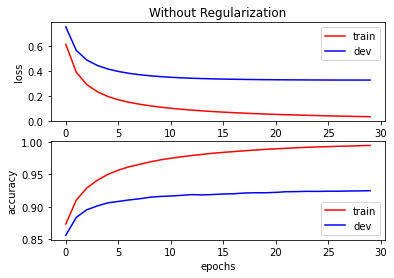

In [2]:
num_epochs = 30
baseline_acc = nn.run_train_test('baseline', all_data, all_labels, 
                                 nn.backward_prop, num_epochs, plot=True)

c) 

For model regularized, got accuracy: 0.967600


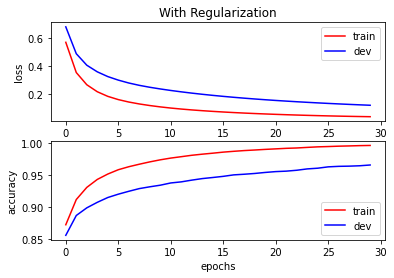

In [3]:
reg_acc = nn.run_train_test('regularized', all_data, all_labels,
    lambda a, b, c, d: nn.backward_prop_regularized(a, b, c, d, reg=0.0001),
    num_epochs, plot=True)

Compare the graph between the non-regularized and regularized training, we could observe there is a larger gap between train and dev in both accuracy and loss for the baseline model. The performance gap for the regularized model is smaller. The difference suggests the regularization term could help prevent overfitting.

d)

In [4]:
print('For model %s, got accuracy: %f' % ('baseline', baseline_acc))
print('For model %s, got accuracy: %f' % ('regularized', reg_acc))

For model baseline, got accuracy: 0.928700
For model regularized, got accuracy: 0.967600


As we observe in part c), the baseline model is overfitting, so the result that regularized model performed better makes sense.